In [1]:
# => fails, necessary on Fedora 27, ipython3 6.2.1
%config Application.log_level='INFO'

import logging

logging.basicConfig(level=logging.INFO)

# Get the root logger and set its level
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [7]:
from src.handlers import Handler, TciaHandler, OpHandler

import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
BASE_PATH = 'Data/'
# ...
TCIA_IMG_SUFFIX = '_PV.nii.gz'
TCIA_LOCATION = BASE_PATH + 'TCIA/'
TCIA_EXCEL_NAME = 'HCC-TACE-Seg_clinical_data-V2.xlsx'
# ...
OP_LOCATION = BASE_PATH + 'OP/'
NIFTI_PATH = 'OP_C+P_nifti'
NNU_NET_PATH = 'OP_C+P_nnUnet'
OP_EXCEL = 'OP_申請建模_1121110_20231223.xlsx'
OP_IMG_SUFFIX = '_VENOUS_PHASE.nii.gz'
OP_MASK_SUFFIX = '_VENOUS_PHASE_seg.nii.gz'
OP_ID_COL_NAME = 'OP_C+P_Tumor識別碼'


In [4]:
global_handler = Handler()

tcia = TciaHandler(TCIA_LOCATION, TCIA_IMG_SUFFIX, TCIA_EXCEL_NAME)
global_handler.add_source(tcia)

op = OpHandler(OP_LOCATION, NIFTI_PATH, NNU_NET_PATH, OP_IMG_SUFFIX, OP_MASK_SUFFIX, OP_EXCEL, OP_ID_COL_NAME)
global_handler.add_source(op)

DEBUG:src.handlers:reading file...
INFO:src.handlers:105 rows in the excel file
INFO:src.handlers:Removed 3 stage-d elements
DEBUG:src.handlers:Classifying...
DEBUG:src.handlers:Looking for paths against contents
DEBUG:src.handlers:File not found: Data/TCIA/TCIA_image_PV/HCC_011_PV.nii.gz
DEBUG:src.handlers:File not found: Data/TCIA/TCIA_image_PV/HCC_031_PV.nii.gz
DEBUG:src.handlers:File not found: Data/TCIA/TCIA_image_PV/HCC_082_PV.nii.gz
DEBUG:src.handlers:None
DEBUG:src.handlers:reading file Data/OP/OP_申請建模_1121110_20231223.xlsx
INFO:src.handlers:200 rows in the excel file
INFO:src.handlers:Removed 55 stage-d elements
DEBUG:src.handlers:Classifying...
DEBUG:src.handlers:Looking for paths against contents
DEBUG:src.handlers:Searching for mismatch on files vs excel data...
DEBUG:src.handlers:Returning new dataframe
DEBUG:src.handlers:None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   99 non-null     object
 1   img     99 non-null     object
 2   mask    99 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   244 non-null    object
 1   img     244 non-null    object
 2   mask    244 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [5]:
global_handler.df

,class,img,mask
0,0,Data/TCIA/TCIA_image_PV/HCC_001_PV.nii.gz,Data/TCIA/TCIA_results_phase_PV/HCC_001_PV.nii.gz
1,2,Data/TCIA/TCIA_image_PV/HCC_002_PV.nii.gz,Data/TCIA/TCIA_results_phase_PV/HCC_002_PV.nii.gz
2,2,Data/TCIA/TCIA_image_PV/HCC_003_PV.nii.gz,Data/TCIA/TCIA_results_phase_PV/HCC_003_PV.nii.gz
3,1,Data/TCIA/TCIA_image_PV/HCC_004_PV.nii.gz,Data/TCIA/TCIA_results_phase_PV/HCC_004_PV.nii.gz
4,2,Data/TCIA/TCIA_image_PV/HCC_005_PV.nii.gz,Data/TCIA/TCIA_results_phase_PV/HCC_005_PV.nii.gz
...,...,...,...
239,0.0,Data/OP/OP_C+P_nifti/OP_0293_VENOUS_PHASE.nii.gz,Data/OP/OP_C+P_nnUnet/OP_0293_VENOUS_PHASE_seg...
240,0.0,Data/OP/OP_C+P_nifti/OP_0294_VENOUS_PHASE.nii.gz,Data/OP/OP_C+P_nnUnet/OP_0294_VENOUS_PHASE_seg...
241,1.0,Data/OP/OP_C+P_nifti/OP_0295_VENOUS_PHASE.nii.gz,Data/OP/OP_C+P_nnUnet/OP_0295_VENOUS_PHASE_seg...
242,0.0,Data/OP/OP_C+P_nifti/OP_0296_VENOUS_PHASE.nii.gz,Data/OP/OP_C+P_nnUnet/OP_0296_VENOUS_PHASE_seg...


In [11]:
sizes = []
print(len(global_handler.df))
for img in global_handler.df['img']:
    data = nib.load(img).get_fdata()
    sizes.append(data.shape[2])
print('done!')

244


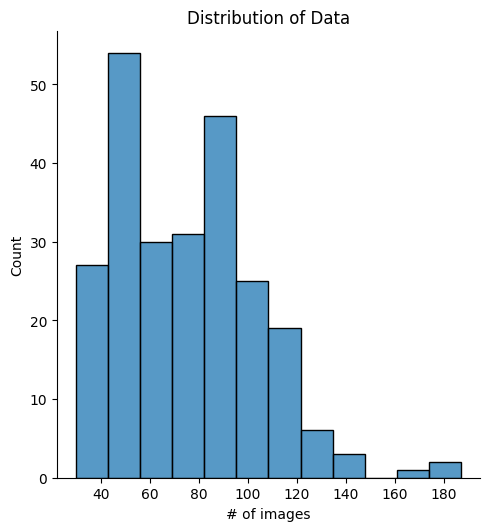

In [15]:
from collections import Counter

sns.displot(sizes, kde=False)  # Plot histogram
plt.xlabel("# of images")
plt.ylabel("Count")
plt.title("Distribution of Data")
plt.show()

In [17]:
from collections import Counter

distribution = Counter(sizes)


distribution

Counter({89: 13,
         79: 7,
         49: 7,
         47: 7,
         44: 7,
         109: 6,
         81: 6,
         85: 6,
         99: 6,
         51: 6,
         41: 6,
         103: 5,
         65: 5,
         91: 5,
         48: 5,
         36: 4,
         95: 4,
         75: 4,
         71: 4,
         63: 4,
         77: 4,
         105: 4,
         121: 4,
         42: 4,
         52: 4,
         53: 4,
         50: 4,
         57: 4,
         69: 3,
         62: 3,
         98: 3,
         67: 3,
         83: 3,
         45: 3,
         43: 3,
         94: 3,
         58: 3,
         84: 3,
         40: 2,
         73: 2,
         97: 2,
         87: 2,
         111: 2,
         37: 2,
         56: 2,
         39: 2,
         92: 2,
         90: 2,
         54: 2,
         61: 2,
         101: 2,
         88: 2,
         38: 2,
         46: 2,
         128: 2,
         113: 1,
         59: 1,
         30: 1,
         118: 1,
         127: 1,
         185: 1,
         170

In [20]:
masks = []
print(len(global_handler.df))
for mask in global_handler.df['mask']:
    data = nib.load(mask).get_fdata()
    masks.append(data.shape[2])
print('done!')

244
done!


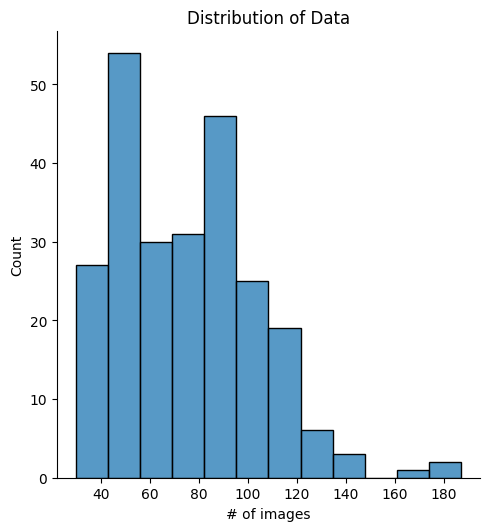

In [21]:
sns.displot(masks, kde=False)  # Plot histogram
plt.xlabel("# of images")
plt.ylabel("Count")
plt.title("Distribution of Data")
plt.show()